<a href="https://colab.research.google.com/github/Jahnavirachel/EduBridge/blob/main/fatal_health_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import scipy.stats as stats 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# Loading data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

Normal, Suspect, Pathological.

In [ ]:
# Loading dataset
df = pd.read_csv('/content/train.csv')

In [ ]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,142.0,0.000,0.000,0.007,0.000,0.0,0.000,58.0,0.4,9.0,...,136.0,156.0,0.0,0.0,148.0,147.0,149.0,1.0,0.0,1.0
1,122.0,0.000,0.000,0.006,0.002,0.0,0.000,27.0,1.4,4.0,...,91.0,144.0,4.0,0.0,126.0,120.0,122.0,6.0,0.0,1.0
2,129.0,0.005,0.003,0.001,0.000,0.0,0.000,34.0,1.7,0.0,...,78.0,196.0,10.0,0.0,137.0,136.0,137.0,6.0,0.0,1.0
3,136.0,0.006,0.000,0.008,0.000,0.0,0.000,45.0,0.8,2.0,...,129.0,158.0,2.0,0.0,144.0,143.0,145.0,1.0,0.0,1.0
4,144.0,0.000,0.000,0.006,0.000,0.0,0.000,32.0,1.0,0.0,...,122.0,160.0,1.0,0.0,150.0,147.0,149.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,129.0,0.000,0.001,0.006,0.008,0.0,0.002,65.0,2.8,0.0,...,50.0,151.0,7.0,2.0,105.0,86.0,112.0,13.0,0.0,3.0
1696,142.0,0.001,0.003,0.001,0.002,0.0,0.000,55.0,1.3,10.0,...,52.0,167.0,15.0,3.0,148.0,142.0,147.0,20.0,1.0,1.0
1697,147.0,0.013,0.000,0.010,0.000,0.0,0.000,36.0,1.2,0.0,...,132.0,174.0,2.0,0.0,157.0,157.0,158.0,2.0,0.0,1.0
1698,130.0,0.003,0.000,0.007,0.000,0.0,0.000,33.0,1.1,0.0,...,103.0,156.0,3.0,0.0,133.0,133.0,134.0,4.0,0.0,1.0


In [ ]:
X = pd.DataFrame(df.iloc[:,:-1])

In [ ]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,142.0,0.000,0.000,0.007,0.000,0.0,0.000,58.0,0.4,9.0,...,20.0,136.0,156.0,0.0,0.0,148.0,147.0,149.0,1.0,0.0
1,122.0,0.000,0.000,0.006,0.002,0.0,0.000,27.0,1.4,4.0,...,53.0,91.0,144.0,4.0,0.0,126.0,120.0,122.0,6.0,0.0
2,129.0,0.005,0.003,0.001,0.000,0.0,0.000,34.0,1.7,0.0,...,118.0,78.0,196.0,10.0,0.0,137.0,136.0,137.0,6.0,0.0
3,136.0,0.006,0.000,0.008,0.000,0.0,0.000,45.0,0.8,2.0,...,29.0,129.0,158.0,2.0,0.0,144.0,143.0,145.0,1.0,0.0
4,144.0,0.000,0.000,0.006,0.000,0.0,0.000,32.0,1.0,0.0,...,38.0,122.0,160.0,1.0,0.0,150.0,147.0,149.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,129.0,0.000,0.001,0.006,0.008,0.0,0.002,65.0,2.8,0.0,...,101.0,50.0,151.0,7.0,2.0,105.0,86.0,112.0,13.0,0.0
1696,142.0,0.001,0.003,0.001,0.002,0.0,0.000,55.0,1.3,10.0,...,115.0,52.0,167.0,15.0,3.0,148.0,142.0,147.0,20.0,1.0
1697,147.0,0.013,0.000,0.010,0.000,0.0,0.000,36.0,1.2,0.0,...,42.0,132.0,174.0,2.0,0.0,157.0,157.0,158.0,2.0,0.0
1698,130.0,0.003,0.000,0.007,0.000,0.0,0.000,33.0,1.1,0.0,...,53.0,103.0,156.0,3.0,0.0,133.0,133.0,134.0,4.0,0.0


In [ ]:
Y = pd.DataFrame(df.iloc[:,-1:])

In [ ]:
Y

,fetal_health
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1695,3.0
1696,1.0
1697,1.0
1698,1.0


# Data Pre-processing

In [ ]:
# handling missing values
df.isnull().sum()  #No null values

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
# To check duplicated values
print(df.duplicated().value_counts()) 

False    1693
True        7
dtype: int64


# Dealing class imbalance

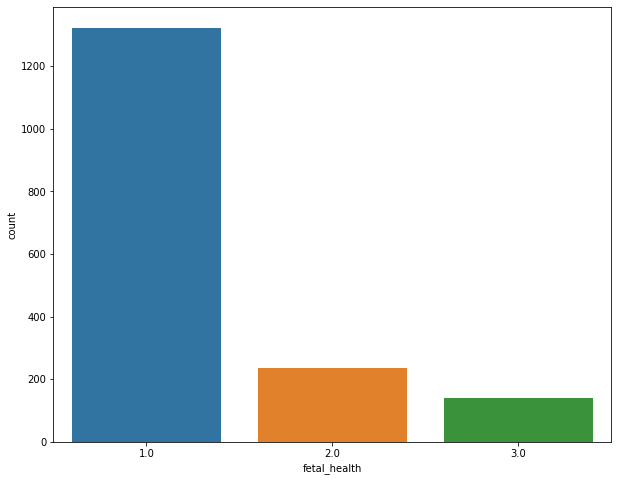

In [ ]:
# To check class imbalance

import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 8)
df['fetal_health'].value_counts()
sns.countplot(x='fetal_health', data=df)
plt.show()

In [ ]:
# To deal with class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_class_train, X_test, y_class_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_class_train.columns
data_X, data_y = os.fit_resample(X_class_train, y_class_train)
smoted_X = pd.DataFrame(data=data_X,columns=columns )
smoted_y= pd.DataFrame(data=data_y,columns=['fetal_health'])
X = smoted_X
Y = smoted_y

# Making training data ready

In [ ]:
# splitting data into train test data
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size=0.2)

In [ ]:
# To scale our data
sc_X = StandardScaler()
sc_X.fit(X_train)
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [ ]:
# To get the columns name to make the scaled output as data frame,
columns_value_new=X_train.columns
test_X_Scaled_Except = pd.DataFrame(X_trainscaled, columns=columns_value_new)

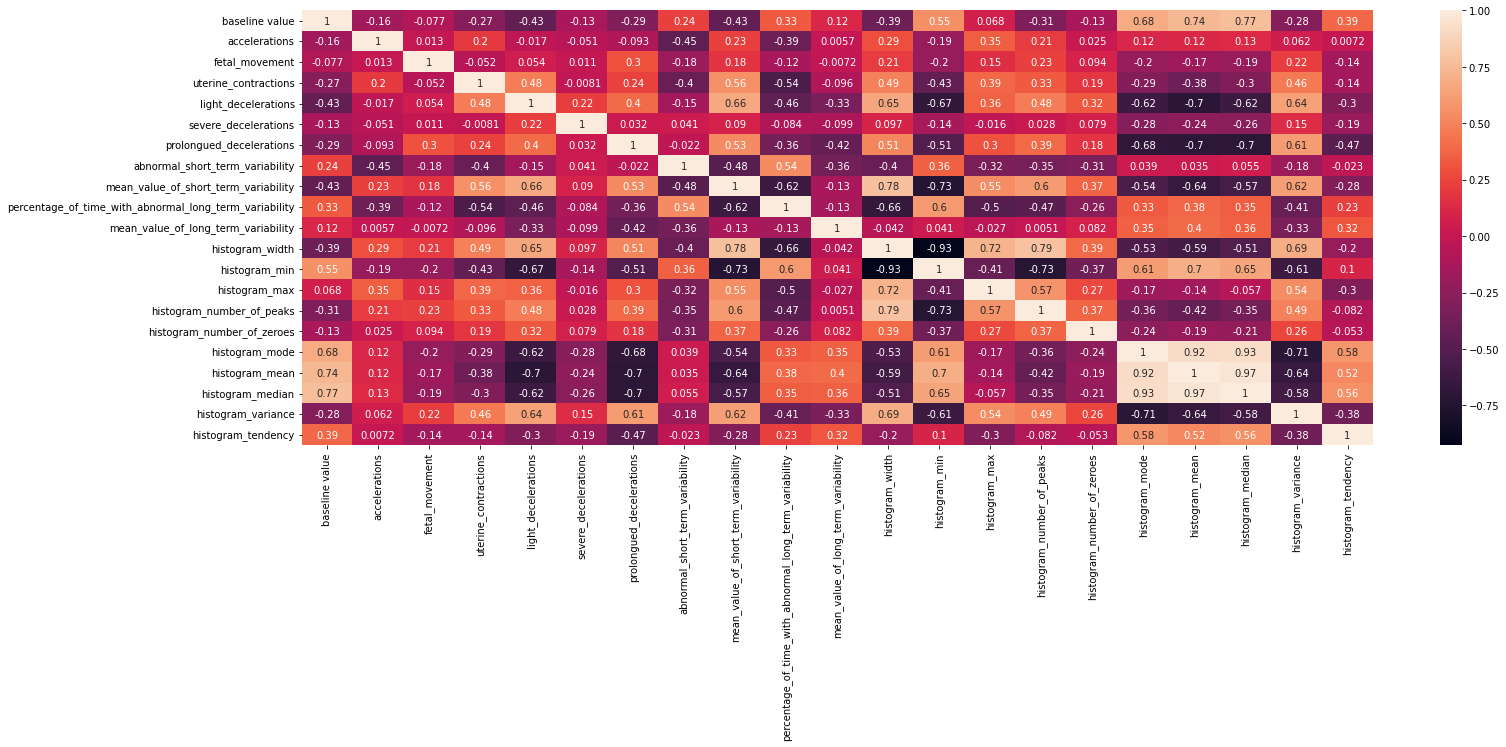

In [ ]:
# Identify significant and independent features using correlation matrix without target variable
import seaborn as sns
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(test_X_Scaled_Except.corr(),annot=True);

In [ ]:
# Doing PCA

from sklearn.decomposition import PCA
PCA_data_train =X_trainscaled
PCA_data_test =X_testscaled
pca = PCA(n_components=15)
pca.fit(PCA_data_train)
X_pca_train= pca.fit_transform(PCA_data_train) 
X_pca_test= pca.fit_transform(PCA_data_test) 
principalDf_train = pd.DataFrame(data = X_pca_train)
principalDf_test = pd.DataFrame(data = X_pca_test)

In [ ]:
# to check principal df for training
principalDf_train.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4.234124,2.827806,-0.755669,-1.440425,-0.041888,-0.122032,1.628294,0.404509,0.314411,-1.165250,0.728823,-0.049599,1.879658,-1.076532,0.290670
1,7.066344,-0.361798,-2.463016,-1.327941,-1.788738,-0.626329,0.268244,-1.468122,-0.019317,-1.841592,2.058061,0.706785,-1.290468,-0.913205,0.396764
2,-1.542296,-2.418107,1.262548,-0.567463,0.110790,-0.704610,-0.392989,0.203934,0.886335,-0.736161,0.884754,-0.946192,-0.166875,0.418904,-0.162382
3,-3.466160,0.317957,-1.146668,0.005983,-0.888459,-0.041402,-0.358691,-0.327426,1.009835,0.033744,0.502204,-0.176019,0.099292,0.434911,-0.369757
4,1.115951,2.977217,0.251030,0.119182,0.505252,0.109849,0.373345,-0.420964,-1.378531,-0.297953,0.219381,-1.625160,0.723949,-0.952450,-0.267050
5,-3.724648,-0.187516,-1.364288,-0.235811,0.176557,0.603551,-0.642028,0.208179,0.352327,-0.268863,0.455514,0.145463,1.181296,-0.005366,-0.414309
6,0.255411,1.628739,0.844336,-2.180698,0.782556,0.205355,-0.185759,-0.084794,0.844851,-0.239195,-0.114830,0.351444,-0.204370,-0.165803,-0.112671
7,2.391455,2.531305,-0.232917,-1.210255,0.585102,0.228259,1.682093,0.628271,-0.753049,-0.845355,-0.317031,-0.092259,0.506340,-0.466827,-1.019501
8,-2.287411,-1.201371,-0.019823,0.081802,0.247282,0.149602,-0.149954,0.001794,-0.600986,-0.095286,-0.230769,0.160089,-0.252625,-0.149557,0.208772
9,-2.903706,-0.029600,-0.891802,-0.593602,-0.404111,0.029406,-0.796857,-0.570885,0.690014,-0.230410,0.149059,-0.721207,-0.175474,0.087872,0.021587


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35d9988c50>,
      dtype=object)

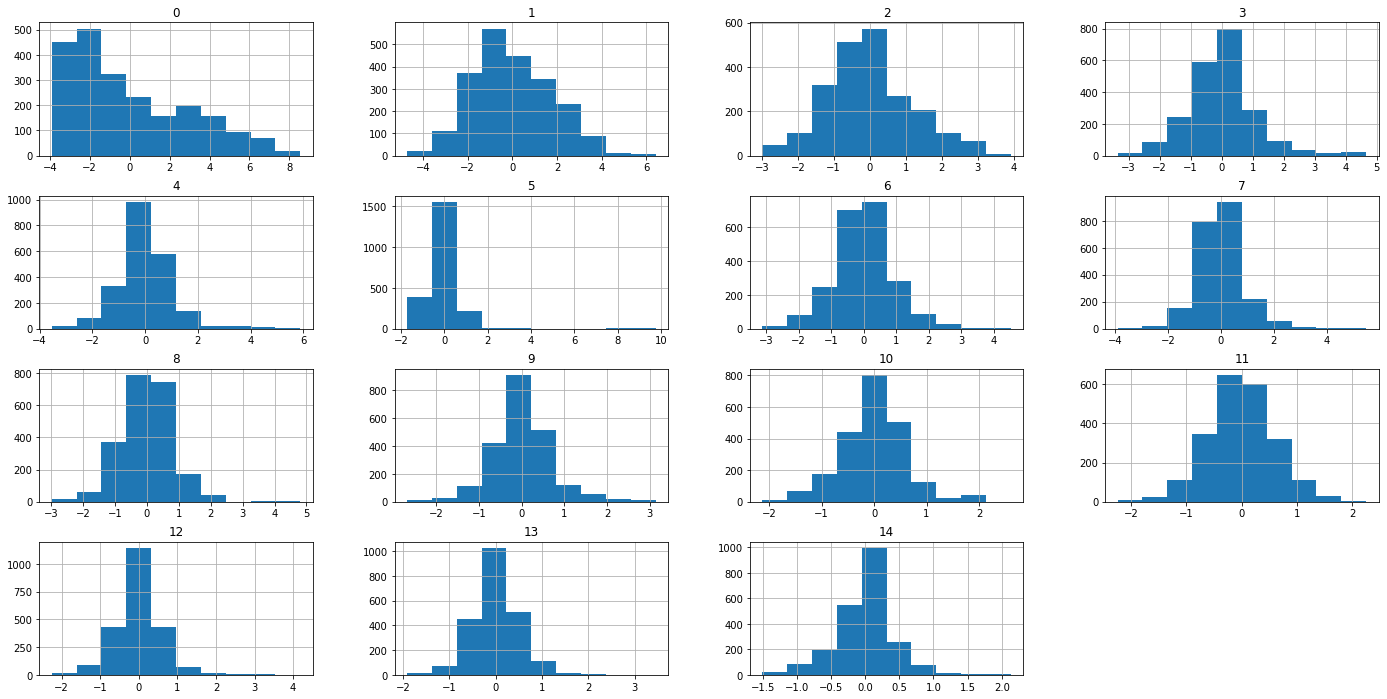

In [ ]:
plt.rcParams["figure.figsize"] = (24, 12)
principalDf_train.hist()

# Experimenting with different algorithms using scaled data

# 1. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_naiveBayes = GaussianNB().fit(X_trainscaled, y_train)
nb_pred = clf_naiveBayes.predict(X_testscaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, nb_pred))

0.7277676950998185


In [ ]:
# to see the accuracy of model
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.66      0.79       183
         2.0       0.57      0.95      0.71       185
         3.0       0.88      0.57      0.69       183

    accuracy                           0.73       551
   macro avg       0.81      0.73      0.73       551
weighted avg       0.81      0.73      0.73       551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


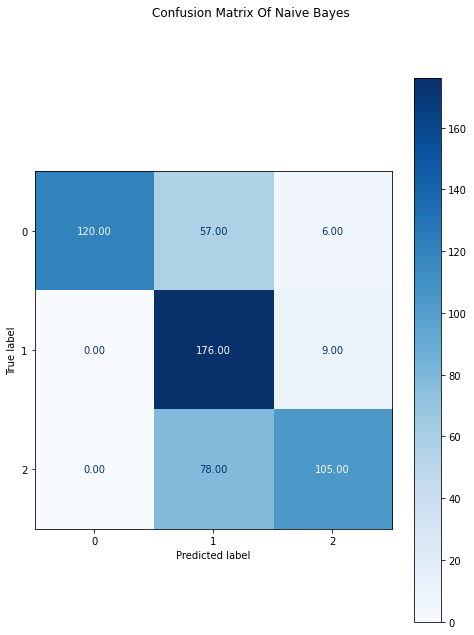

In [ ]:
# To see confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf_naiveBayes, X_testscaled, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix Of Naive Bayes")
plt.show()

# 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0).fit(X_trainscaled, y_train)
dt_pred = clf_dt.predict(X_testscaled)

In [ ]:
print(accuracy_score(y_test, dt_pred))

0.9600725952813067


In [ ]:
# to see the accuracy of model
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.93      0.94       183
         2.0       0.93      0.96      0.94       185
         3.0       1.00      0.99      0.99       183

    accuracy                           0.96       551
   macro avg       0.96      0.96      0.96       551
weighted avg       0.96      0.96      0.96       551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


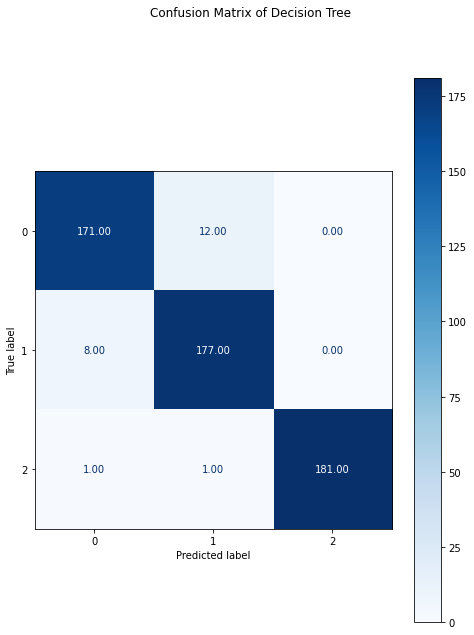

In [ ]:
# To see confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf_dt, X_testscaled, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of Decision Tree")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=20, random_state=0).fit(X_trainscaled, y_train)
rf_pred = clf_rf.predict(X_testscaled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(accuracy_score(y_test, rf_pred))

0.969147005444646


In [ ]:
# to see the accuracy of model
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         1.0       0.98      0.93      0.96       183
         2.0       0.94      0.98      0.96       185
         3.0       0.99      0.99      0.99       183

    accuracy                           0.97       551
   macro avg       0.97      0.97      0.97       551
weighted avg       0.97      0.97      0.97       551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


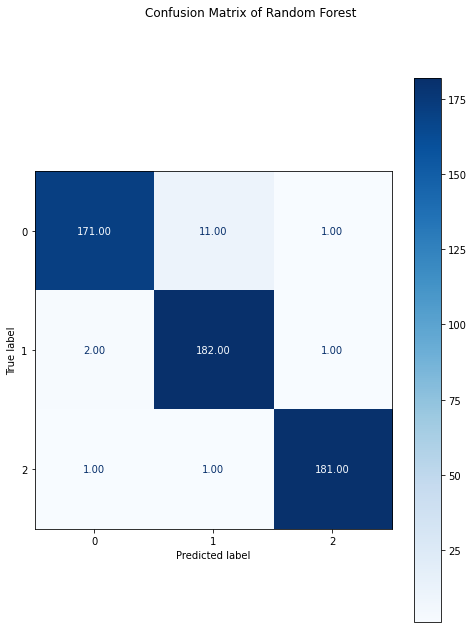

In [ ]:
# To see confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf_rf, X_testscaled, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of Random Forest")
plt.show()

# Conclusion
When we used scaled data we got to know that RANDOM FOREST performs best with 97% accuracy, but when we used PCA data we got to know that NAIVE BAYES is the best in classifying with 63% accuracy.